In [87]:
import pandas as pd
import numpy as np
import utils
from maps.cell_phenotyping import Trainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt

In [88]:
phenotypes = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/manual_phenotypes.csv', index_col=0)

In [89]:
phenotypes

CD38  Perilipin   Vimentin  \
index                                                                    
phenotyping_TS-373_IMC04_MGUS_001_1     2.820669   2.971790   2.232437   
phenotyping_TS-373_IMC04_MGUS_001_2     3.221329   1.346206   3.683721   
phenotyping_TS-373_IMC04_MGUS_001_3     4.646876   2.178688  32.496047   
phenotyping_TS-373_IMC04_MGUS_001_4     3.848248   1.370344  18.569980   
phenotyping_TS-373_IMC04_MGUS_001_5     3.057037   4.149075  16.497443   
...                                          ...        ...        ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  2.443533   1.898812  14.195283   
phenotyping_TS-373_IMC72_MGUS_002_8792  0.894721   0.694672   1.998731   
phenotyping_TS-373_IMC72_MGUS_002_8793  1.419571   0.340787   2.666016   
phenotyping_TS-373_IMC72_MGUS_002_8794  2.822165   0.688112  11.944447   
phenotyping_TS-373_IMC72_MGUS_002_8795  2.443746   3.095496   4.134512   

                                          B4GALT1        MPO  CathepsinK  \
index                                                                      
phenotyping_TS-373_IMC04_MGUS_001_1      3.080601   3.068583    0.252880   
phenotyping_TS-373_IMC04_MGUS_001_2      4.887145   0.605874    0.546567   
phenotyping_TS-373_IMC04_MGUS_001_3      6.667213   1.867209    2.031601   
phenotyping_TS-373_IMC04_MGUS_001_4     12.310481   1.566320    0.744549   
phenotyping_TS-373_IMC04_MGUS_001_5      4.102445  21.820074    1.634126   
...                                           ...        ...         ...   
phenotyping_TS-373_IMC72_MGUS_002_8791   4.807537   3.102740    0.755195   
phenotyping_TS-373_IMC72_MGUS_002_8792   2.476895   1.017747    0.126578   
phenotyping_TS-373_IMC72_MGUS_002_8793   3.321490   4.820140    0.117231   
phenotyping_TS-373_IMC72_MGUS_002_8794   3.997991   1.401751    0.957829   
phenotyping_TS-373_IMC72_MGUS_002_8795   3.014695   2.866540    0.362855   

                                            ATP5A     RUNX2      HIF1A  \
index                                                                    
phenotyping_TS-373_IMC04_MGUS_001_1      0.266667  0.243394  21.850770   
phenotyping_TS-373_IMC04_MGUS_001_2      4.004035  0.418336  11.184370   
phenotyping_TS-373_IMC04_MGUS_001_3     45.773793  1.065691   3.907972   
phenotyping_TS-373_IMC04_MGUS_001_4      7.623629  0.784765   1.273494   
phenotyping_TS-373_IMC04_MGUS_001_5      3.225763  0.576907  34.223742   
...                                           ...       ...        ...   
phenotyping_TS-373_IMC72_MGUS_002_8791   7.123426  0.743884  15.241155   
phenotyping_TS-373_IMC72_MGUS_002_8792  10.064010  0.282716   5.786556   
phenotyping_TS-373_IMC72_MGUS_002_8793   5.448980  0.084983   0.689063   
phenotyping_TS-373_IMC72_MGUS_002_8794   9.737594  0.395874  25.150460   
phenotyping_TS-373_IMC72_MGUS_002_8795   5.517507  0.645362  26.559910   

                                            CD11b  ...    ST6GAL1      CD138  \
index                                              ...                         
phenotyping_TS-373_IMC04_MGUS_001_1      3.734479  ...   5.995002   1.563348   
phenotyping_TS-373_IMC04_MGUS_001_2      3.483259  ...   5.358893   2.238205   
phenotyping_TS-373_IMC04_MGUS_001_3      7.608204  ...   5.430253  16.552399   
phenotyping_TS-373_IMC04_MGUS_001_4      7.585115  ...   3.623699   0.850611   
phenotyping_TS-373_IMC04_MGUS_001_5     15.328794  ...  11.155745   0.331008   
...                                           ...  ...        ...        ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  16.317046  ...   2.495335   0.076923   
phenotyping_TS-373_IMC72_MGUS_002_8792   4.766635  ...   1.905505   0.100000   
phenotyping_TS-373_IMC72_MGUS_002_8793   1.987666  ...   4.568269   0.193632   
phenotyping_TS-373_IMC72_MGUS_002_8794  12.429793  ...   1.410213   0.432407   
phenotyping_TS-373_IMC72_MGUS_002_8795  16.111827  ...   3.487578   0.266359   

                                        area  Y_centroid  X_centroid  \
index           

In [90]:
transformed = np.arcsinh(phenotypes.iloc[:, 0:32])

In [91]:
phenotypes.drop(columns=phenotypes.columns[0:32], inplace=True)

In [92]:
phenotypes = pd.concat([transformed, phenotypes, ], axis=1)

In [93]:
phenotypes

CD38  Perilipin  Vimentin  \
index                                                                   
phenotyping_TS-373_IMC04_MGUS_001_1     1.760158   1.809488  1.543002   
phenotyping_TS-373_IMC04_MGUS_001_2     1.886206   1.106312  2.015005   
phenotyping_TS-373_IMC04_MGUS_001_3     2.240724   1.520806  4.174502   
phenotyping_TS-373_IMC04_MGUS_001_4     2.057235   1.120623  3.615418   
phenotyping_TS-373_IMC04_MGUS_001_5     1.836331   2.130248  3.497270   
...                                          ...        ...       ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  1.626053   1.397445  3.347295   
phenotyping_TS-373_IMC72_MGUS_002_8792  0.804938   0.648296  1.443068   
phenotyping_TS-373_IMC72_MGUS_002_8793  1.149305   0.334513  1.707183   
phenotyping_TS-373_IMC72_MGUS_002_8794  1.760658   0.642901  3.175161   
phenotyping_TS-373_IMC72_MGUS_002_8795  1.626134   1.848220  2.126831   

                                         B4GALT1       MPO  CathepsinK  \
index                                                                    
phenotyping_TS-373_IMC04_MGUS_001_1     1.843631  1.839914    0.250259   
phenotyping_TS-373_IMC04_MGUS_001_2     2.290062  0.573855    0.522470   
phenotyping_TS-373_IMC04_MGUS_001_3     2.595926  1.382622    1.457679   
phenotyping_TS-373_IMC04_MGUS_001_4     3.205244  1.230997    0.688781   
phenotyping_TS-373_IMC04_MGUS_001_5     2.119264  3.776502    1.266933   
...                                          ...       ...         ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  2.273977  1.850444    0.697298   
phenotyping_TS-373_IMC72_MGUS_002_8792  1.638616  0.893867    0.126242   
phenotyping_TS-373_IMC72_MGUS_002_8793  1.915488  2.276541    0.116964   
phenotyping_TS-373_IMC72_MGUS_002_8794  2.094225  1.138999    0.851238   
phenotyping_TS-373_IMC72_MGUS_002_8795  1.823083  1.775376    0.355330   

                                           ATP5A     RUNX2     HIF1A  \
index                                                                  
phenotyping_TS-373_IMC04_MGUS_001_1     0.263603  0.241053  3.777907   
phenotyping_TS-373_IMC04_MGUS_001_2     2.095691  0.407006  3.109657   
phenotyping_TS-373_IMC04_MGUS_001_3     4.516978  0.927070  2.072147   
phenotyping_TS-373_IMC04_MGUS_001_4     2.728674  0.720727  1.062186   
phenotyping_TS-373_IMC04_MGUS_001_5     1.887520  0.548922  4.226280   
...                                          ...       ...       ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  2.661427  0.688247  3.418221   
phenotyping_TS-373_IMC72_MGUS_002_8792  3.004572  0.279079  2.456068   
phenotyping_TS-373_IMC72_MGUS_002_8793  2.396891  0.084881  0.643683   
phenotyping_TS-373_IMC72_MGUS_002_8794  2.971767  0.386202  3.918418   
phenotyping_TS-373_IMC72_MGUS_002_8795  2.409186  0.607332  3.972904   

                                           CD11b  ...   ST6GAL1     CD138  \
index                                             ...                       
phenotyping_TS-373_IMC04_MGUS_001_1     2.028218  ...  2.490958  1.229396   
phenotyping_TS-373_IMC04_MGUS_001_2     1.961111  ...  2.380498  1.545357   
phenotyping_TS-373_IMC04_MGUS_001_3     2.726666  ...  2.393505  3.500589   
phenotyping_TS-373_IMC04_MGUS_001_4     2.723652  ...  1.999159  0.771703   
phenotyping_TS-373_IMC04_MGUS_001_5     3.423942  ...  3.107105  0.325243   
...                                          ...  ...       ...       ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  3.486295  ...  1.645497  0.076847   
phenotyping_TS-373_IMC72_MGUS_002_8792  2.265614  ...  1.400559  0.099834   
phenotyping_TS-373_IMC72_MGUS_002_8793  1.438106  ...  2.224051  0.192442   
phenotyping_TS-373_IMC72_MGUS_002_8794  3.214858  ...  1.143904  0.419954   
phenotyping_TS-373_IMC72_MGUS_002_8795  3.473662  ...  1.962302  0.263306   

                                        area  Y_centroid  X_centroid  \
index                                                                  
phenotyping_TS-373_IMC04_MGUS_001_1       15    

In [94]:
encoder = LabelEncoder()
encoder.fit(phenotypes.phenotype.unique())

LabelEncoder()

In [95]:
labels = encoder.transform(phenotypes.phenotype)

In [96]:
phenotypes['cell_label'] = labels

In [97]:
train_data, remaining_data = train_test_split(phenotypes, test_size=0.3, random_state=20240528)
validate_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=20240528)

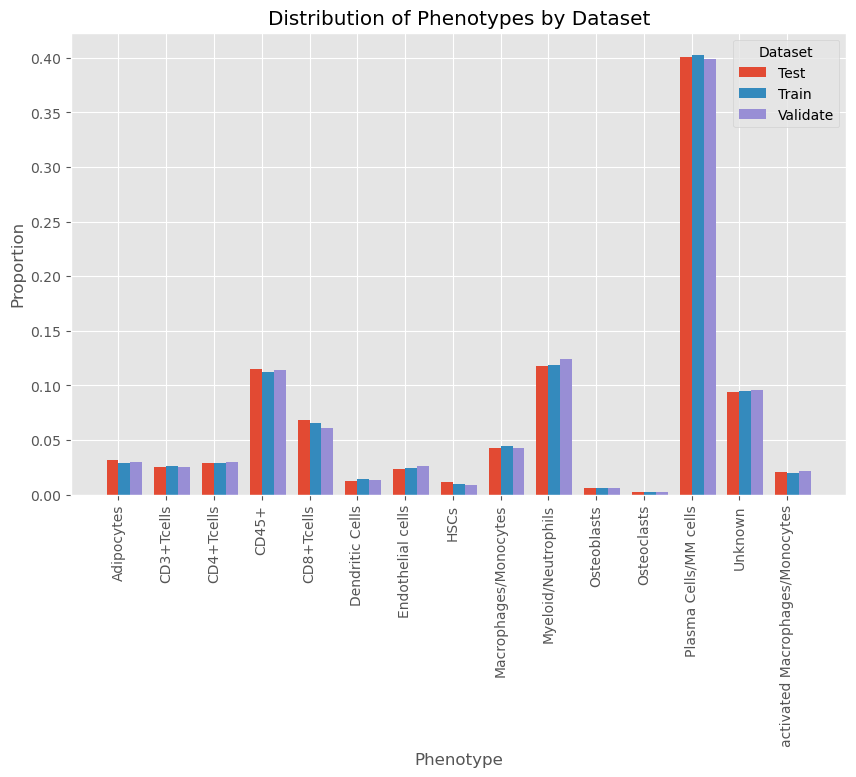

In [98]:
plt.style.use('ggplot')
train_data_copy = train_data.copy()
train_data_copy['Dataset'] = 'Train'

validate_data_copy = validate_data.copy()
validate_data_copy['Dataset'] = 'Validate'

test_data_copy = test_data.copy()
test_data_copy['Dataset'] = 'Test'

# Concatenate the copies into a single DataFrame
combined_data = pd.concat([train_data_copy, validate_data_copy, test_data_copy])

# Calculate counts and normalize
count_data = combined_data.groupby(['phenotype', 'Dataset']).size().unstack(fill_value=0)
normalized_data = count_data.div(count_data.sum(axis=0), axis=1)  # Normalize by total counts in each dataset

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
width = 0.25

# X locations for the groups
x = np.arange(len(normalized_data.index))

# Plot each dataset's normalized counts
for i, dataset in enumerate(normalized_data.columns):
    ax.bar(x + i * width, normalized_data[dataset], width, label=dataset)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Phenotype')
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Phenotypes by Dataset')
ax.set_xticks(x + width / 2)  # Adjust x-ticks to be in the middle of the groups
ax.set_xticklabels(normalized_data.index, rotation=90)
ax.legend(title='Dataset')
plt.savefig('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS - no_distance/standard/phenotype_distribution_maps.png', dpi=300)
plt.show()

In [99]:
train_data_coordinates = train_data[["X_centroid", "Y_centroid", "phenotype", "cell_label"]]
train_data.drop(columns=["Y_centroid", "X_centroid", "phenotype"], inplace=True)
train_data.reset_index(drop=True, inplace=True)
validate_data_coordinates = validate_data[["X_centroid", "Y_centroid", "phenotype", "cell_label"]]
validate_data.drop(columns=["Y_centroid", "X_centroid", "phenotype"], inplace=True)
validate_data.reset_index(drop=True, inplace=True)
test_data_coordinates = test_data[["X_centroid", "Y_centroid", "phenotype", "cell_label"]]
test_data.drop(columns=["Y_centroid", "X_centroid", "phenotype"], inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [100]:

print(f"Training Data: {train_data.shape[0]} rows")
print(f"Validation Data: {validate_data.shape[0]} rows")
print(f"Test Data: {test_data.shape[0]} rows")

Training Data: 43309 rows
Validation Data: 9280 rows
Test Data: 9281 rows


In [101]:
train_data.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/standard/train_data.csv', index=False)
validate_data.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/standard/validate_data.csv', index=False)
test_data.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/standard/test_data.csv', index=False)
#train_data_coordinates.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/train_data_coordinates.csv', index=False)
#validate_data_coordinates.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/validate_data_coordinates.csv', index=False)
#test_data_coordinates.to_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/test_data_coordinates.csv', index=False)

In [102]:
train_data_path = '/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/standard/train_data.csv'
valid_data_path = '/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/standard/validate_data.csv'

In [104]:
model = Trainer(results_dir='/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS - no_distance/standard/', num_features=36, num_classes=15, batch_size=128, max_epochs=500, min_epochs=150, patience=50, verbose=0)
model.fit(train_data_path, valid_data_path)

Train Epoch: 0, train_loss: 2.3720, train_acc: 0.1424, train_auc: 0.7232                 
Valid Epoch: 0, valid_loss: 2.2003, valid_acc: 0.1998, valid_auc: 0.8181                 
--------------------Saving best model--------------------
Time to process epoch(0): 0.8074 minutes                             

Train Epoch: 1, train_loss: 1.8041, train_acc: 0.3090, train_auc: 0.8638                 
Valid Epoch: 1, valid_loss: 1.6983, valid_acc: 0.2872, valid_auc: 0.9145                 
--------------------Saving best model--------------------
Time to process epoch(1): 0.8077 minutes                             

Train Epoch: 2, train_loss: 1.3383, train_acc: 0.4964, train_auc: 0.9252                 
Valid Epoch: 2, valid_loss: 1.5022, valid_acc: 0.4295, valid_auc: 0.9373                 
--------------------Saving best model--------------------
Time to process epoch(2): 0.8085 minutes                             

Train Epoch: 3, train_loss: 1.1681, train_acc: 0.5558, train_auc: 0.9422 

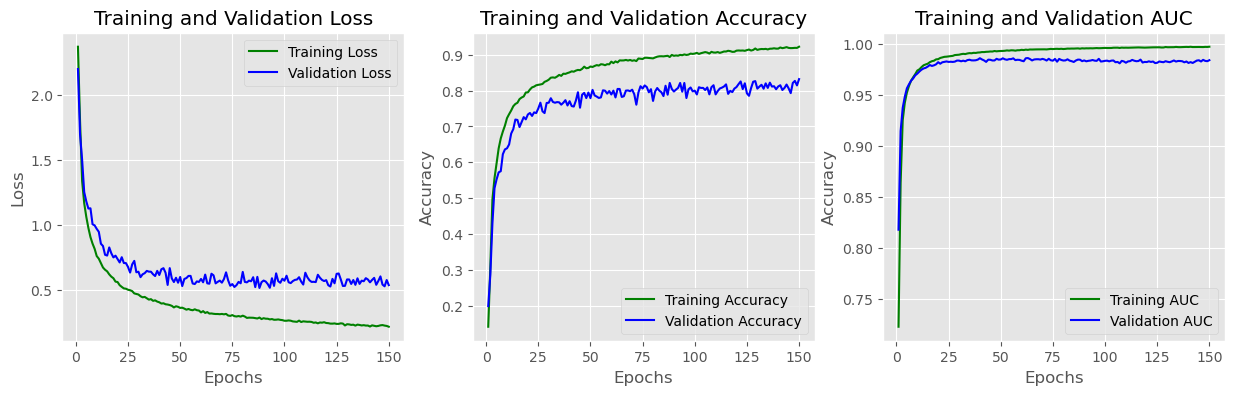

In [109]:
utils.visulize_training_logs('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/standard/training_logs.csv')

In [41]:
labels.shape

(61870,)

In [42]:
class_names = encoder.classes_

In [43]:
class_names = class_names.tolist()

In [44]:
class_names

['Adipocytes',
 'CD3+Tcells',
 'CD4+Tcells',
 'CD45+',
 'CD8+Tcells',
 'Dendritic Cells',
 'Endothelial cells',
 'HSCs',
 'Macrophages/Monocytes',
 'Myeloid/Neutrophils',
 'Osteoblasts',
 'Osteoclasts',
 'Plasma Cells/MM cells',
 'Unknown',
 'activated Macrophages/Monocytes']

In [45]:
phenotypes

CD38  Perilipin  Vimentin  \
index                                                                   
phenotyping_TS-373_IMC04_MGUS_001_1     1.760158   1.809488  1.543002   
phenotyping_TS-373_IMC04_MGUS_001_2     1.886206   1.106312  2.015005   
phenotyping_TS-373_IMC04_MGUS_001_3     2.240724   1.520806  4.174502   
phenotyping_TS-373_IMC04_MGUS_001_4     2.057235   1.120623  3.615418   
phenotyping_TS-373_IMC04_MGUS_001_5     1.836331   2.130248  3.497270   
...                                          ...        ...       ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  1.626053   1.397445  3.347295   
phenotyping_TS-373_IMC72_MGUS_002_8792  0.804938   0.648296  1.443068   
phenotyping_TS-373_IMC72_MGUS_002_8793  1.149305   0.334513  1.707183   
phenotyping_TS-373_IMC72_MGUS_002_8794  1.760658   0.642901  3.175161   
phenotyping_TS-373_IMC72_MGUS_002_8795  1.626134   1.848220  2.126831   

                                         B4GALT1       MPO  CathepsinK  \
index                                                                    
phenotyping_TS-373_IMC04_MGUS_001_1     1.843631  1.839914    0.250259   
phenotyping_TS-373_IMC04_MGUS_001_2     2.290062  0.573855    0.522470   
phenotyping_TS-373_IMC04_MGUS_001_3     2.595926  1.382622    1.457679   
phenotyping_TS-373_IMC04_MGUS_001_4     3.205244  1.230997    0.688781   
phenotyping_TS-373_IMC04_MGUS_001_5     2.119264  3.776502    1.266933   
...                                          ...       ...         ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  2.273977  1.850444    0.697298   
phenotyping_TS-373_IMC72_MGUS_002_8792  1.638616  0.893867    0.126242   
phenotyping_TS-373_IMC72_MGUS_002_8793  1.915488  2.276541    0.116964   
phenotyping_TS-373_IMC72_MGUS_002_8794  2.094225  1.138999    0.851238   
phenotyping_TS-373_IMC72_MGUS_002_8795  1.823083  1.775376    0.355330   

                                           ATP5A     RUNX2     HIF1A  \
index                                                                  
phenotyping_TS-373_IMC04_MGUS_001_1     0.263603  0.241053  3.777907   
phenotyping_TS-373_IMC04_MGUS_001_2     2.095691  0.407006  3.109657   
phenotyping_TS-373_IMC04_MGUS_001_3     4.516978  0.927070  2.072147   
phenotyping_TS-373_IMC04_MGUS_001_4     2.728674  0.720727  1.062186   
phenotyping_TS-373_IMC04_MGUS_001_5     1.887520  0.548922  4.226280   
...                                          ...       ...       ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  2.661427  0.688247  3.418221   
phenotyping_TS-373_IMC72_MGUS_002_8792  3.004572  0.279079  2.456068   
phenotyping_TS-373_IMC72_MGUS_002_8793  2.396891  0.084881  0.643683   
phenotyping_TS-373_IMC72_MGUS_002_8794  2.971767  0.386202  3.918418   
phenotyping_TS-373_IMC72_MGUS_002_8795  2.409186  0.607332  3.972904   

                                           CD11b  ...     CD138  area  \
index                                             ...                   
phenotyping_TS-373_IMC04_MGUS_001_1     2.028218  ...  1.229396    15   
phenotyping_TS-373_IMC04_MGUS_001_2     1.961111  ...  1.545357    34   
phenotyping_TS-373_IMC04_MGUS_001_3     2.726666  ...  3.500589    19   
phenotyping_TS-373_IMC04_MGUS_001_4     2.723652  ...  0.771703    13   
phenotyping_TS-373_IMC04_MGUS_001_5     3.423942  ...  0.325243    20   
...                                          ...  ...       ...   ...   
phenotyping_TS-373_IMC72_MGUS_002_8791  3.486295  ...  0.076847    13   
phenotyping_TS-373_IMC72_MGUS_002_8792  2.265614  ...  0.099834    20   
phenotyping_TS-373_IMC72_MGUS_002_8793  1.438106  ...  0.192442    24   
phenotyping_TS-373_IMC72_MGUS_002_8794  3.214858  ...  0.419954    11   
phenotyping_TS-373_IMC72_MGUS_002_8795  3.473662  ...  0.263306    23   

                                        Y_centroid  X_centroid  \
index                                                            
phenotyping_TS-373_IMC04_MGUS_001_1       0.800000  152.600000   
phenotyping_TS-373_IMC04_MGUS_001_2       1.41

In [111]:
pred_labels, pred_probs = model.predict('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/test_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/MAPS-distance_to_bone/test_data.csv'

In [47]:
color_palette =['#bed8d9', '#2bb8b2', '#fed53f', '#f98866', '#fe0000']
gt_labels = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/phenotyping/MAPS/test_data.csv')['cell_label'].to_numpy()

In [48]:
gt_labels

array([12, 13,  9, ...,  4, 13,  3])

/Users/lukashat/miniforge3/envs/MAPS/lib/python3.9/site-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


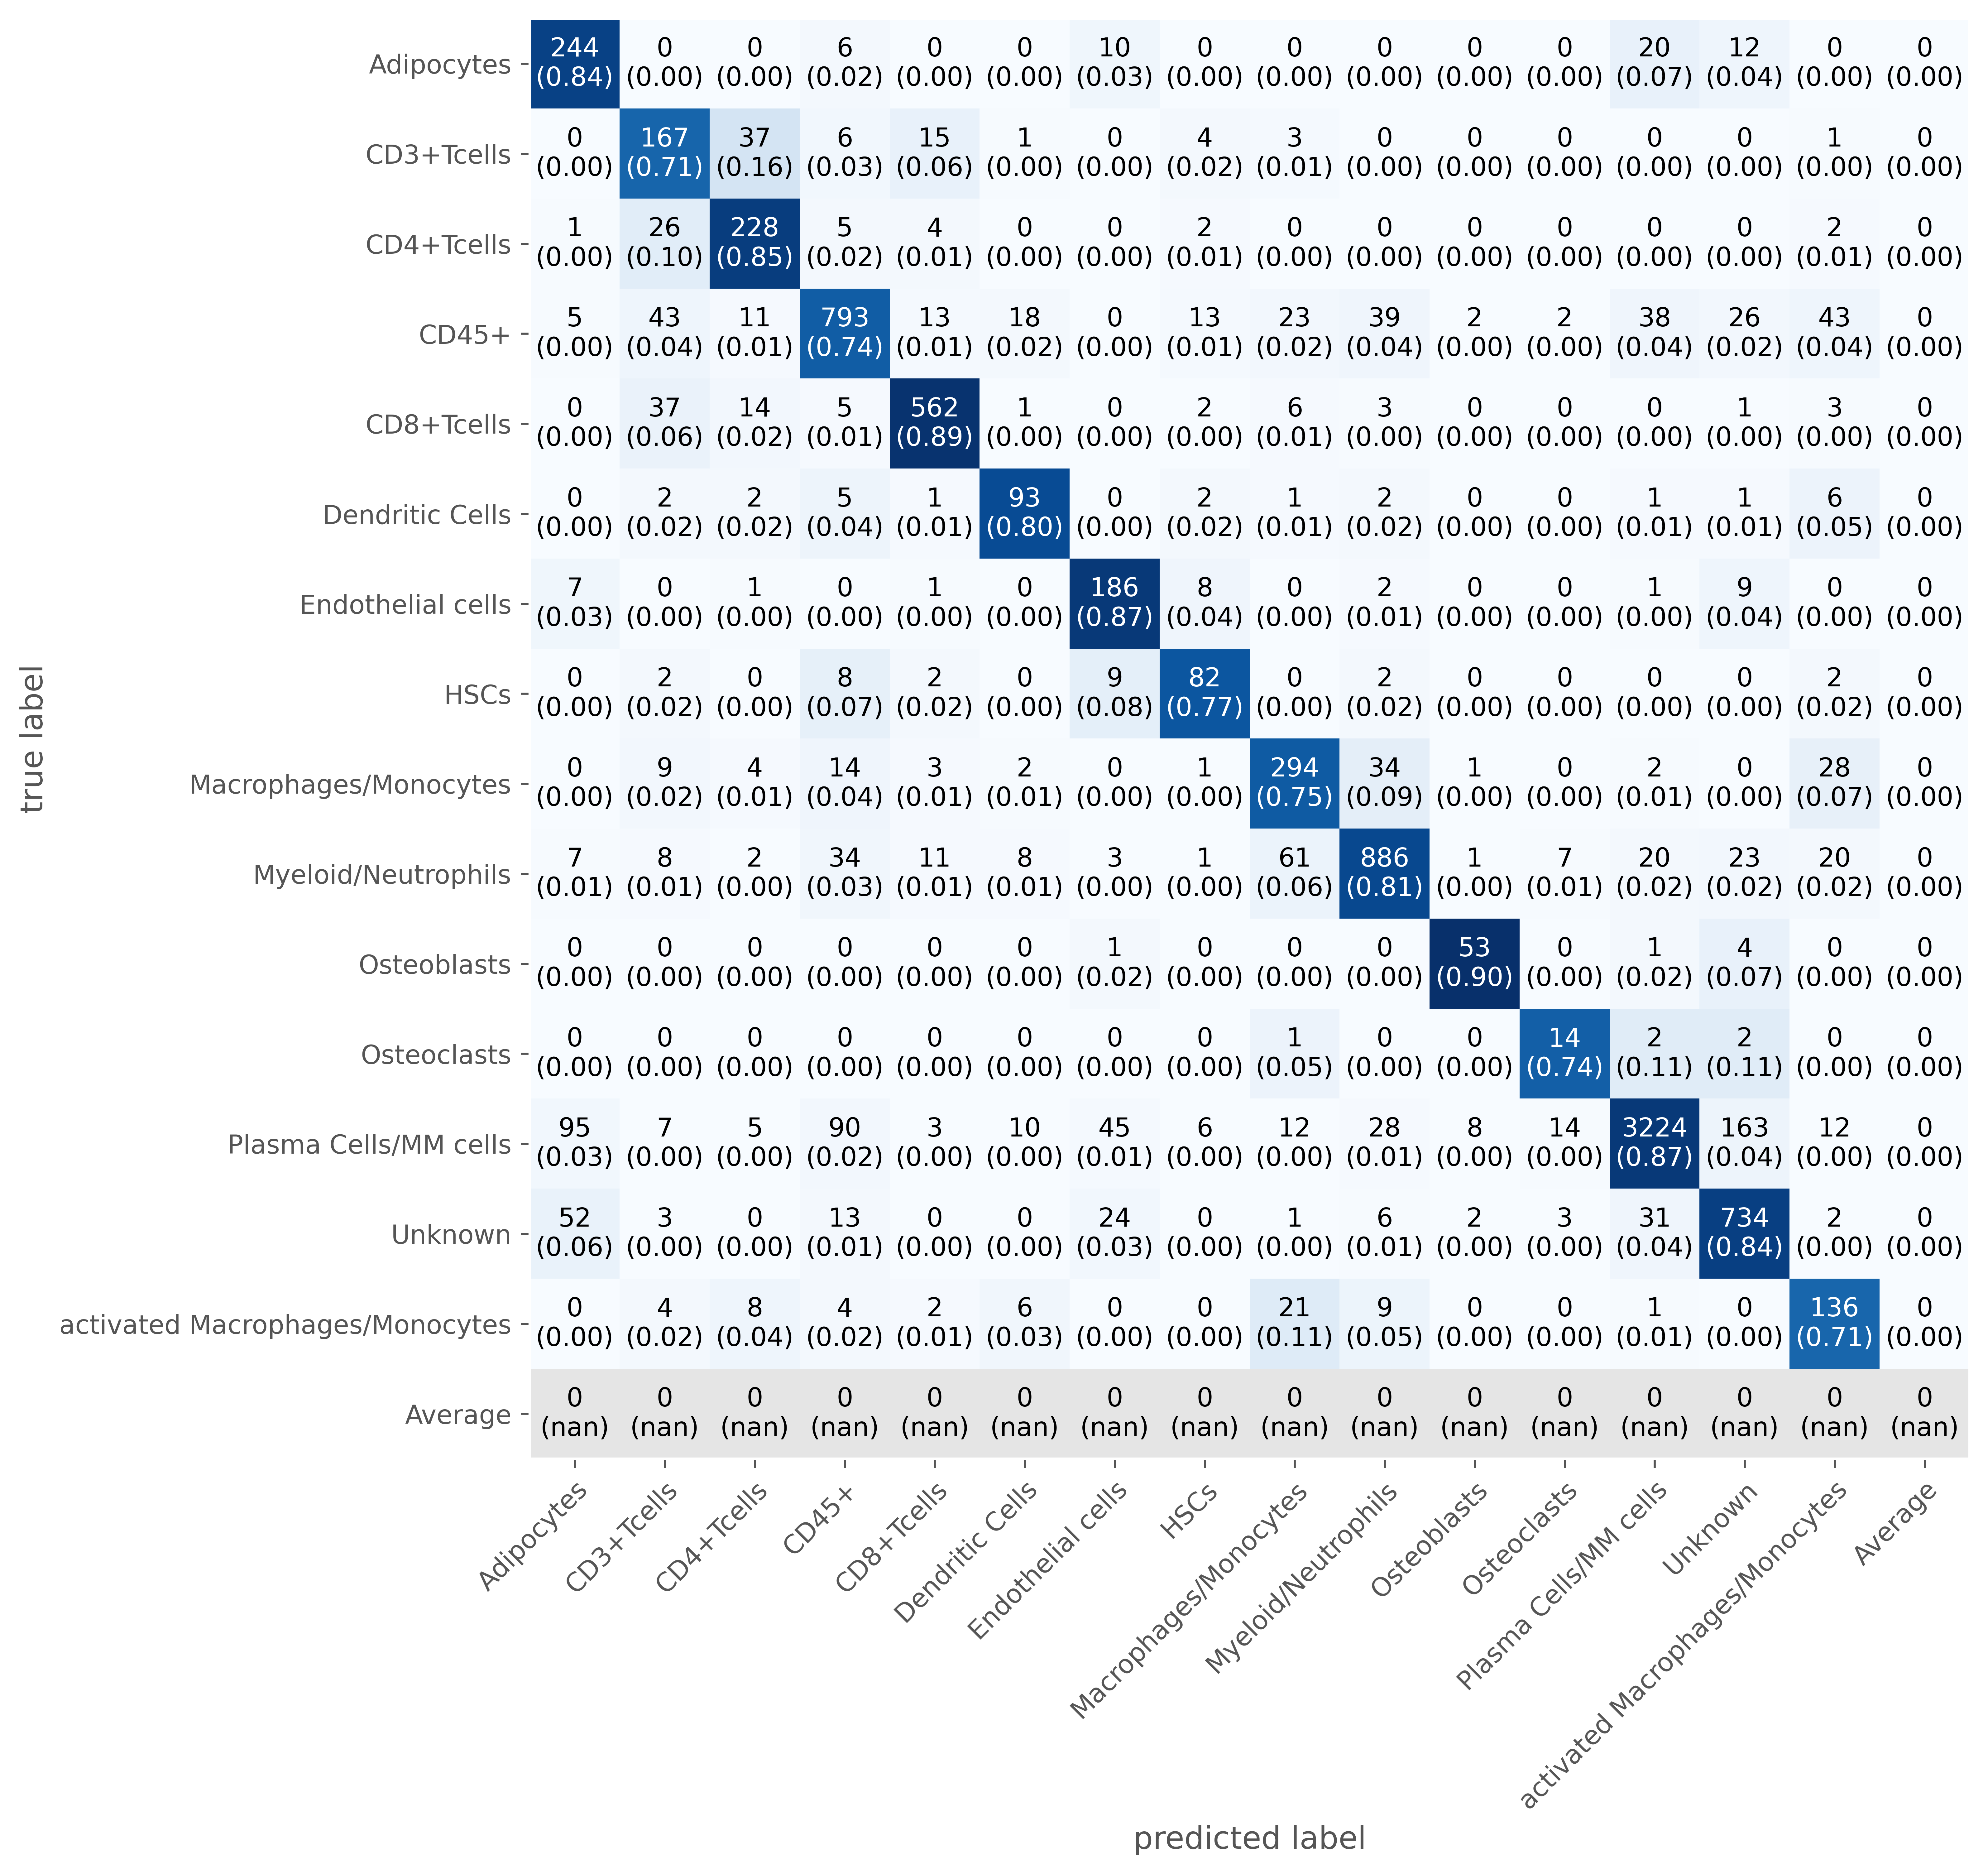

In [110]:
utils.conf_matrix(gt_labels, pred_labels, class_names)

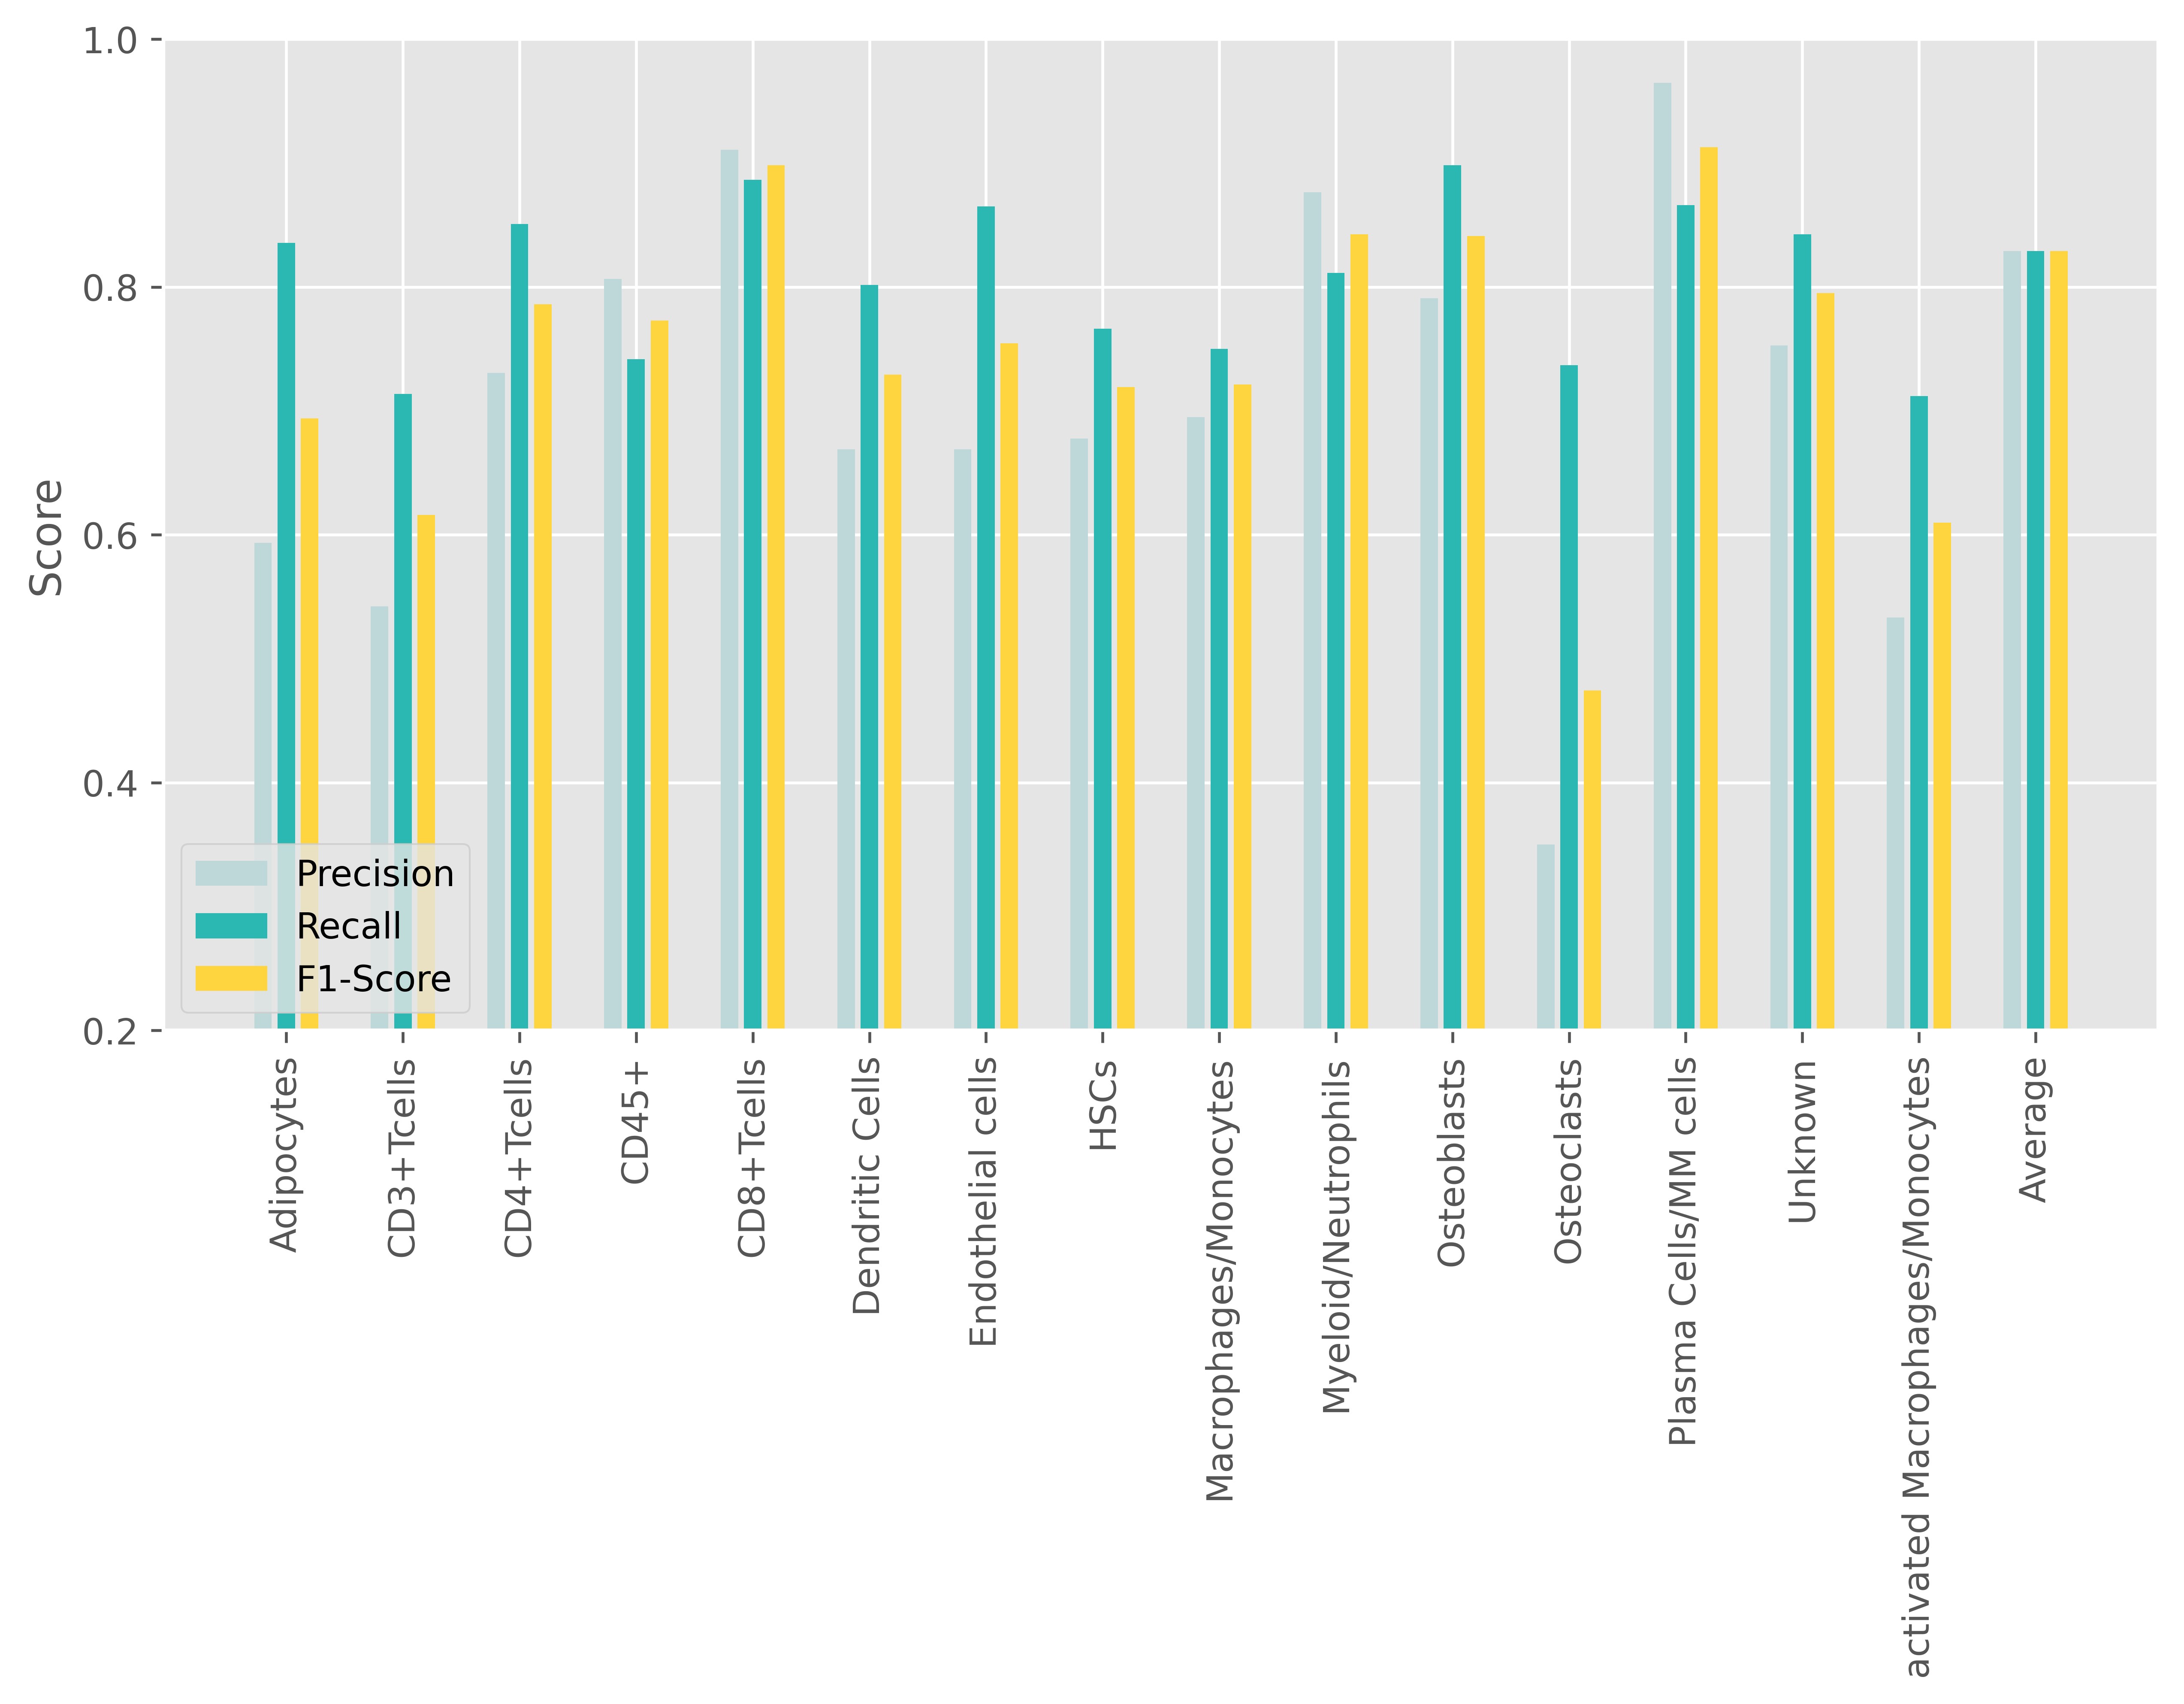

In [50]:
utils.pre_recall_f1_score(gt_labels, pred_labels, class_names, color_palette)

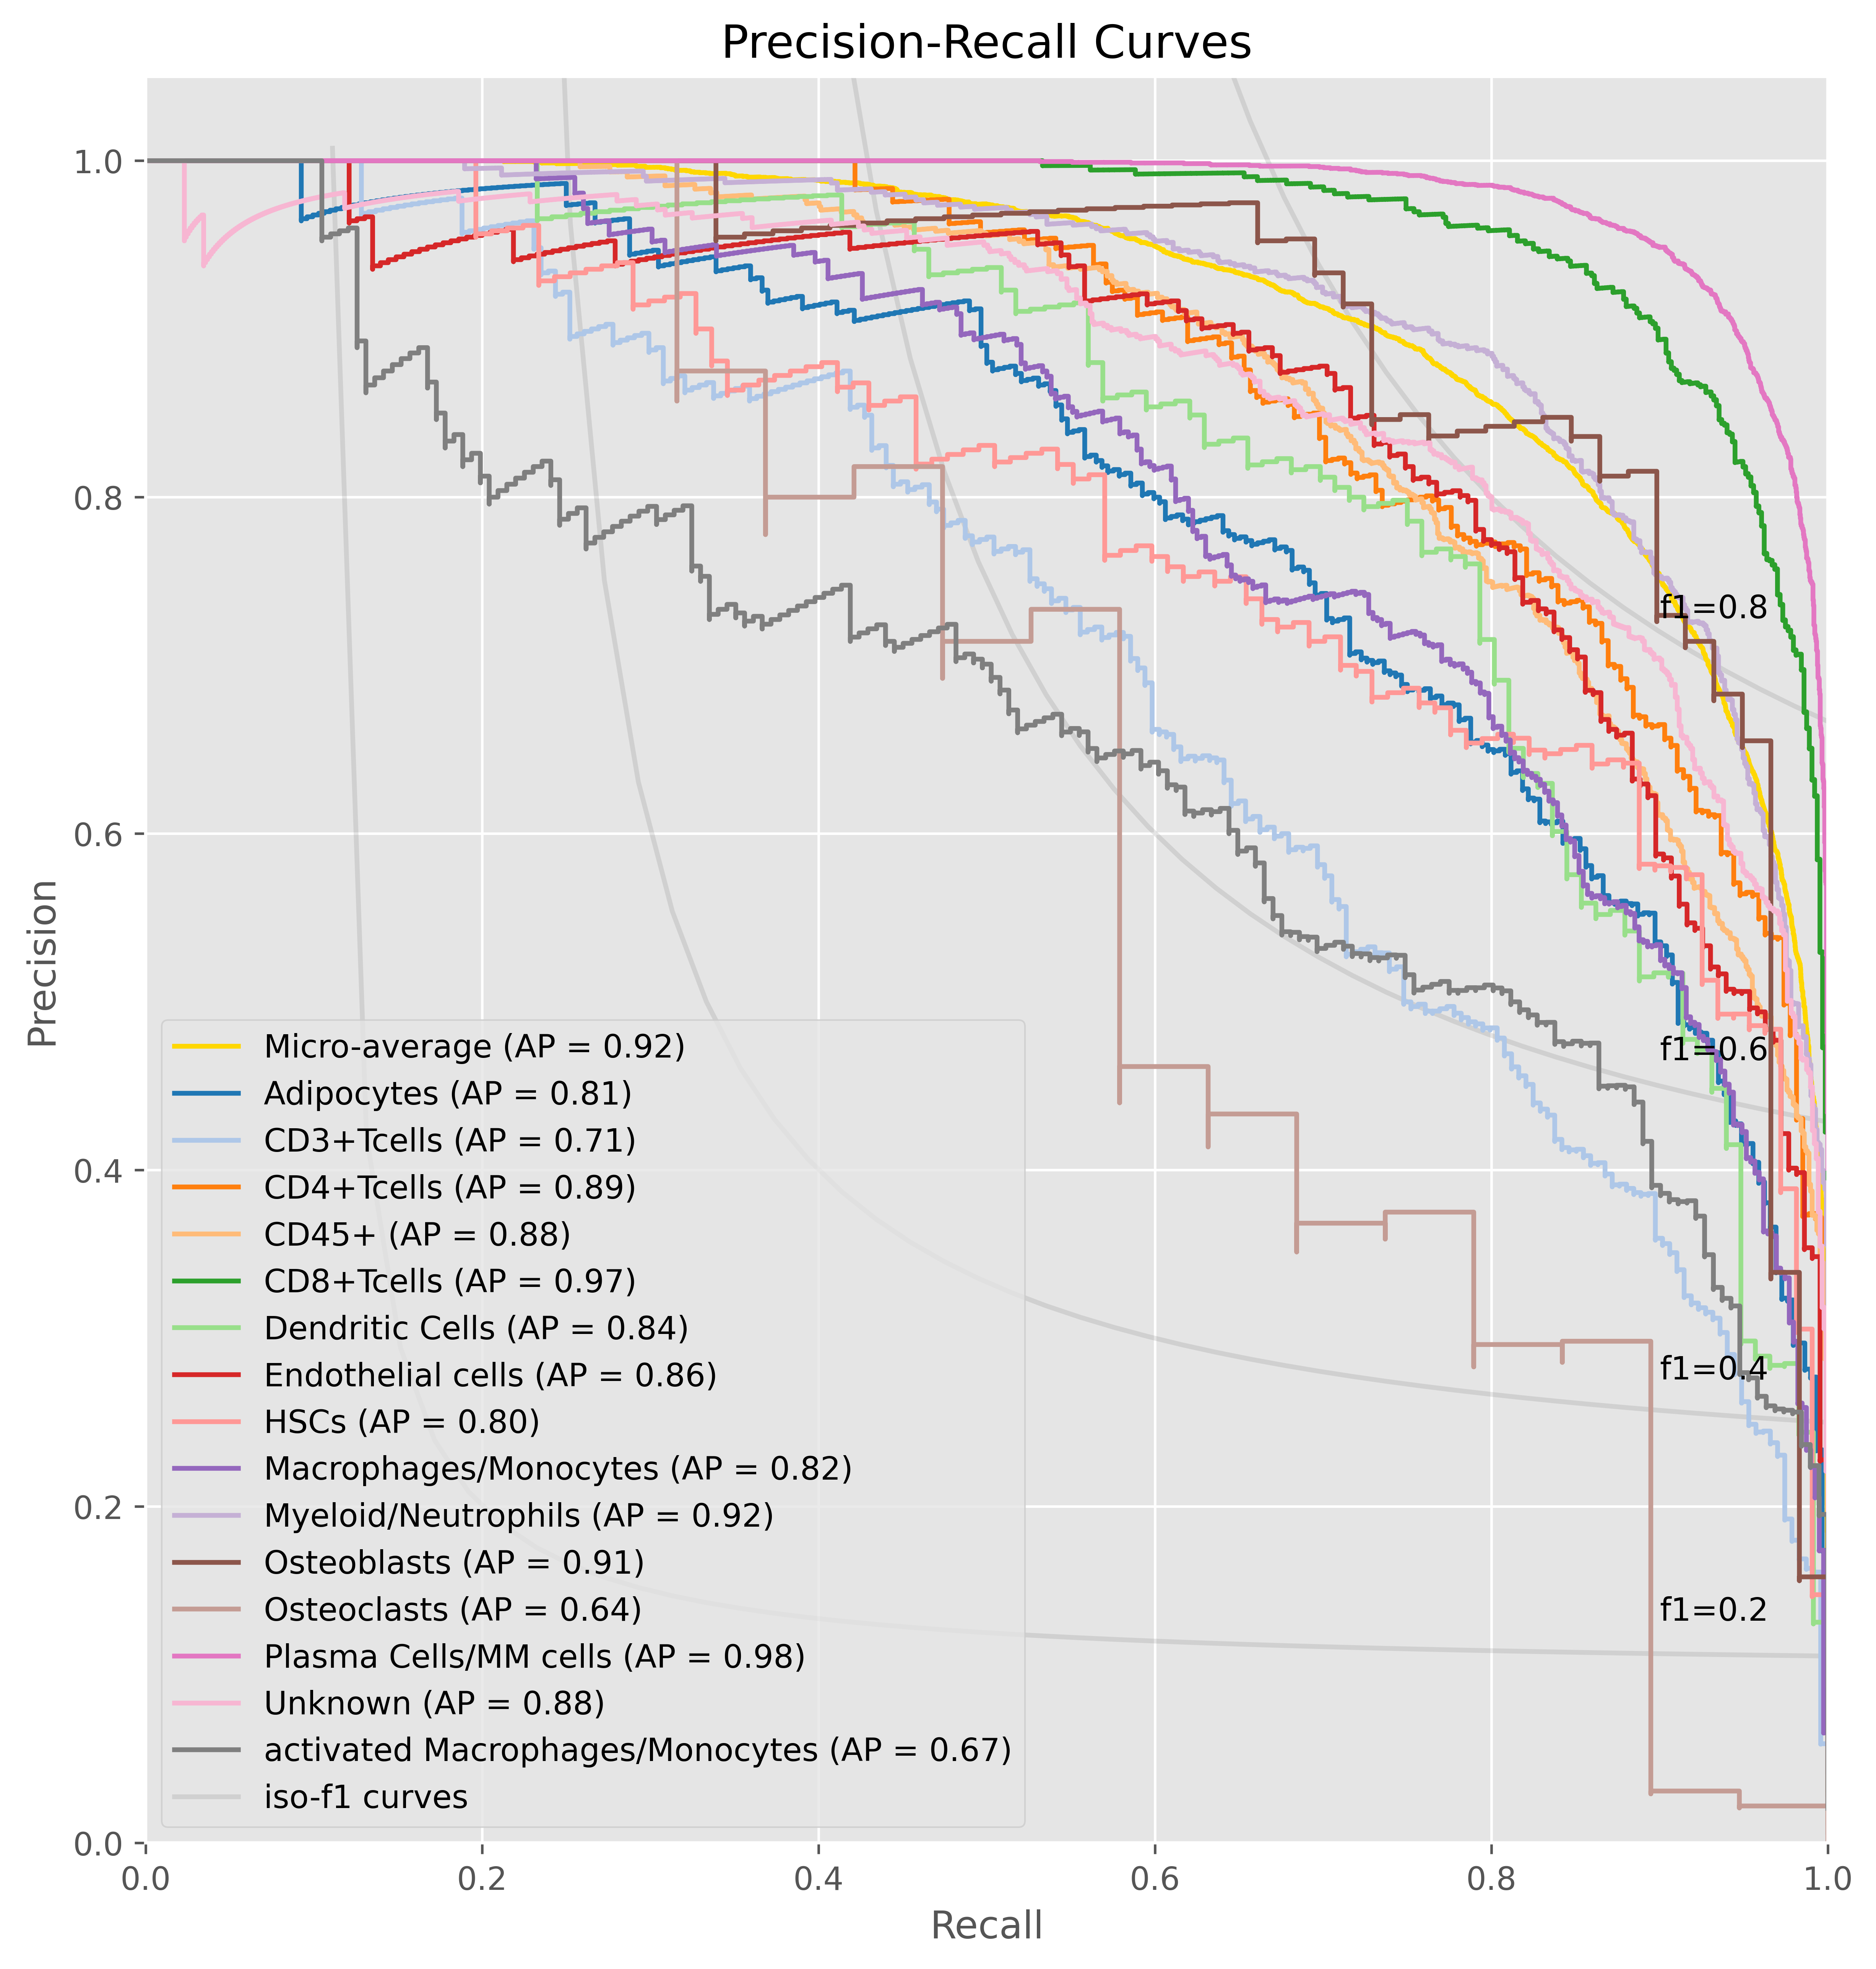

In [53]:
utils.average_pr_curve_per_class(gt_labels, pred_labels, pred_probs, class_names[:-1])

In [41]:

print("Shape of pred_probs:", pred_probs.shape)
print("Number of classes:", len(class_names))

Shape of pred_probs: (4974, 16)
Number of classes: 17
